## 1. Prepare the enviroment & import dataset

In [1]:
# import packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset and preview
daily_activity = pd.read_csv('dailyActivity_merged.csv')
daily_activity.head(6)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728


In [3]:
# check out missing values in the dataset
missing_values_count = daily_activity.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [4]:
# get the infomation of the dataset
daily_activity.info

<bound method DataFrame.info of              Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2016       13162       8.500000         8.500000   
1    1503960366    4/13/2016       10735       6.970000         6.970000   
2    1503960366    4/14/2016       10460       6.740000         6.740000   
3    1503960366    4/15/2016        9762       6.280000         6.280000   
4    1503960366    4/16/2016       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391     5/8/2016       10686       8.110000         8.110000   
936  8877689391     5/9/2016       20226      18.250000        18.250000   
937  8877689391    5/10/2016       10733       8.150000         8.150000   
938  8877689391    5/11/2016       21420      19.559999        19.559999   
939  8877689391    5/12/2016        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  Mode

In [5]:
# describe all
daily_activity.describe(include='all')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
unique,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/12/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.855407e+09,NaN,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,NaN,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,NaN,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,NaN,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000


In [6]:
# Count distinct IDs to confirm whether data has 30 IDs as claimed by the survey
unique_id = len(pd.unique(daily_activity["Id"]))
print('Number of unique ID: ' + str(unique_id))

Number of unique ID: 33


### From the above observations, we noted that:

1. Data has 15 columns and 940 rows

2. There are no Null or missing values

3. ActivityDate is wrongly classified as object dtype and has to be converted to datetime64 dtype

4. There are 33 distinct IDs, instead of 30 distinct IDs as expected. Some users might have created additional IDs during the survey period

## 2. Clean & transform data

In [7]:
# Convert ActivityDate from object to datetime64type
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format = "%m/%d/%Y")

daily_activity.info()
daily_activity.ActivityDate.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [8]:
# Create new list of re-arranged columns

new_cols = ['Id', 'ActivityDate','DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 
            'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

In [9]:
# reindex function to re-arrange columns based on "new_cols"

df_activity = daily_activity.reindex(columns=new_cols)
df_activity.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [10]:
# Create new column "day_of_the_week" to represent day of the week
df_activity["DayOfTheWeek"] = df_activity["ActivityDate"].dt.day_name()
df_activity["DayOfTheWeek"].head(5)


0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [11]:
# Rearranging and renaming columns from "MmmNnn" to "mmm_nnn"
df_activity.rename(columns={"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", 
                              "TotalDistance":"total_dist", "TrackerDistance":"track_dist", 
                              "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", 
                              "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", 
                              "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", 
                              "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", 
                              "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins",
                              "TotalExerciseHours":"total_hours","Calories":"calories"}, inplace=True)

print(df_activity.columns.values)
df_activity.head(5)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [12]:
# create new column "total_mins" containing sum of total minutes

df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

### The data is now ready for analysis.

## 3. Analyze the dataset

In [13]:
# take a look at general statistic
df_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,0.0,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,NaN,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,NaN,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,NaN,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,NaN,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,NaN,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,NaN,4900.000000


### Statistical findings:
* On average, users logged 7,637 steps or 5.4km which is not adequate. As recommended by Centre for Disease Control (CDC), an adult female has to aim at least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement. Source: Medical News Today article
* Sedentary users are the majority logging on average 991 minutes or 20 hours making up 81% of total average minutes.
* Note that average calories burned is 2,303 calories which is equal to 0.6 pound. This could not interpret into detail as calories burned depend on several factors such as the age, weight, daily tasks, exercise, hormones and daily calorie intake. Source: Health Line article

## 4. Visualize the findings

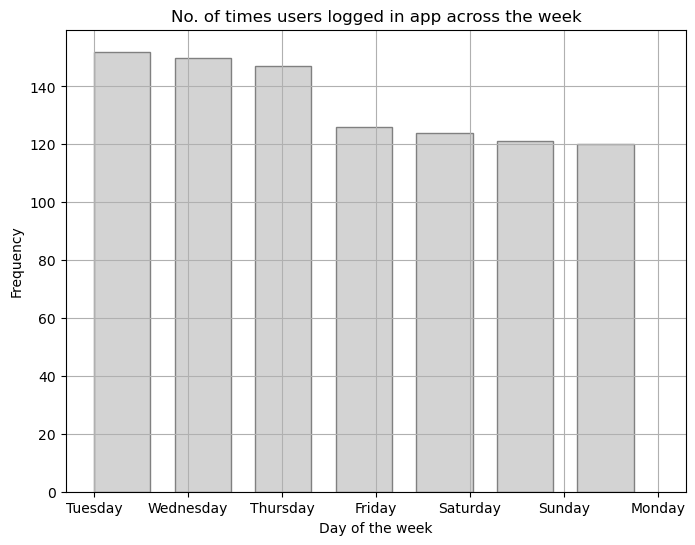

In [14]:
# create histogram for No.times users logged in app across week

# plot histogram
plt.style.use("default")
plt.figure(figsize=(8, 6))
plt.hist(df_activity.day_of_the_week, bins = 7, width = 0.6, color = "lightgrey", edgecolor = "grey")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

### This histogram shows that:
* Users prefer or remember (giving them the benefit of doubt that they had forgotten) to track their activity on the app during midweek from Tuesday to Friday.
* Note that the frequency dropped on Friday and continue on weekends and Monday.

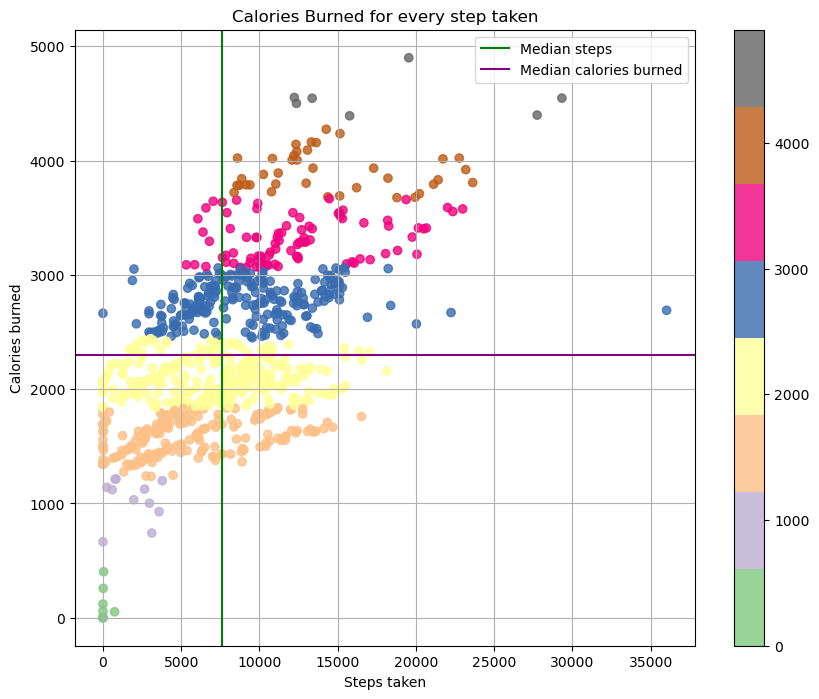

In [15]:
# Create scatter plot for Calories Burned for Every Step taken
plt.style.use("default")
plt.figure(figsize=(10, 8))
plt.scatter(df_activity.total_steps, df_activity.calories, alpha = 0.8, c = df_activity.calories, cmap = "Accent")

# add annotations and visuals

median_calories = 2303
median_steps = 7637
plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Green", label = "Median steps")
plt.axhline(median_calories, color = "Purple", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories Burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

### The following discoveries were made from the scatter plot:
   
1. It is a positive correlation.

2. Intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards.

3. Noted a few outliers:
    * Zero steps with zero to minimal calories burned.
    * 1 observation of > 35,000 steps with < 3,000 calories burned.
    * Deduced that outliers could be due to natural variation of data, change in user’s usage or errors in data collection (ie. miscalculations, data contamination or human error).

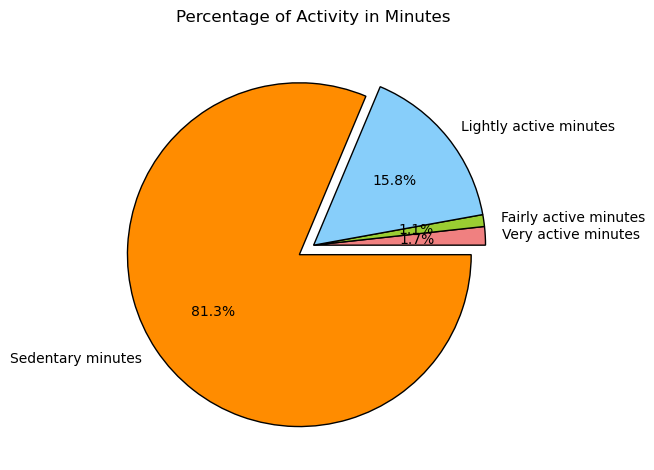

In [16]:
# Create pie chart showing Percentage of Activity in Minutes

# calculating total of individual minutes column
very_active_mins = df_activity["very_active_mins"].sum()
fairly_active_mins = df_activity["fairly_active_mins"].sum()
lightly_active_mins = df_activity["lightly_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

### From this pie chart:

1. Sedentary minutes takes the largest slice at 81.3%

2. This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands

3. App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness

## 5. Deliver insights & recommendations


### 1. What are the trends identified? 

* Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits. 

* Users prefer to track their activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends.

### 2. How could these trends apply to Bellabeat customers? 

* Both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness can very well be applied to Bellabeat customers.

### 3. How could these trends help influence Bellabeat marketing strategy? 

* Bellabeat marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app. 

* On weekends, Bellabeat app can also prompt notification to encourage users to exercise.